# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

## Импорт библиотек

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [ ]:
# В Keras встроены средства работы с популярными наборами данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Проверка**

Правильный ответ:  2


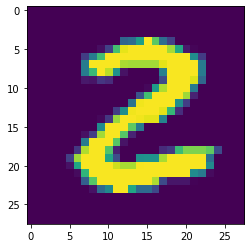

In [ ]:
n = 25
plt.imshow(x_train_org[n, :, :])
print("Правильный ответ: ", y_train_org[n])
plt.show()


**Проверка размерности загруженных данных**  

In [ ]:
print("Тренировочные данные:", x_train_org.shape)
print("Тренировочные метки:", y_train_org.shape)
print("Тестовые данные:", x_test_org.shape)
print("Тестовые метки:", y_test_org.shape)

Тренировочные данные: (60000, 28, 28)
Тренировочные метки: (60000,)
Тестовые данные: (10000, 28, 28)
Тестовые метки: (10000,)


**Преобразование размерности данных в наборе**  

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**  

In [ ]:
# Так как мы имеем дело с вектором, то операция будет применена к каждом элементу
# этого вектора
x_train = x_train.astype('float32')
x_train = x_train / 255

**Работа с правильными ответами**

In [ ]:
print(y_train_org[n])

2


**Преобразуем метки в формат one hot encoding**  

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[n])
print(y_test[n])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [ ]:
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [ ]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history= model.fit(x_train, y_train, batch_size=200, epochs=15,  verbose=1)

Epoch 1/15
300/300 [==============================] - 5s 16ms/step - loss: 0.2740 - accuracy: 0.9229
Epoch 2/15
300/300 [==============================] - 5s 16ms/step - loss: 0.1094 - accuracy: 0.9684
Epoch 3/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0726 - accuracy: 0.9785
Epoch 4/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0515 - accuracy: 0.9847
Epoch 5/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0355 - accuracy: 0.9901
Epoch 6/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0263 - accuracy: 0.9930
Epoch 7/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0198 - accuracy: 0.9953
Epoch 8/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0147 - accuracy: 0.9966
Epoch 9/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0114 - accuracy: 0.9975
Epoch 10/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0088 - accura

**Проверка ИНС на контрольном наборе**  

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 15.0930 - accuracy: 0.9807
test_acc: 0.9807000160217285


## Обучение на трех наборах  

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=30,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
240/240 [==============================] - 4s 19ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0096 - val_accuracy: 0.9973
Epoch 2/30
240/240 [==============================] - 4s 18ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0115 - val_accuracy: 0.9958
Epoch 3/30
240/240 [==============================] - 4s 18ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0078 - val_accuracy: 0.9979
Epoch 4/30
240/240 [==============================] - 4s 18ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0049 - val_accuracy: 0.9985
Epoch 5/30
240/240 [==============================] - 4s 18ms/step - loss: 4.9723e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 6/30
240/240 [==============================] - 4s 18ms/step - loss: 3.2832e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 7/30
240/240 [==============================] - 4s 17ms/step - loss: 2.7521e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accu

**Построим график**

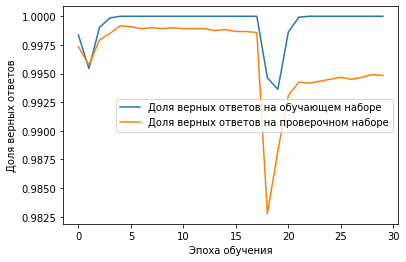

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [ ]:
model.save("mnist_dense.h5")


In [ ]:
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [ ]:
files.download("mnist_dense.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Используем сеть для распознавания рукописных цифр

In [ ]:
n_rec = 10

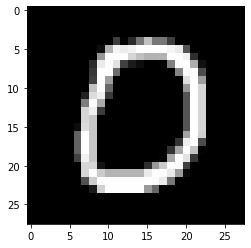

In [ ]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [ ]:
print(prediction)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(prediction)

0


**Печатаем правильный ответ**

In [ ]:
print(y_test_org[n_rec])

0


## Загружаем свою картинку

In [ ]:
files.upload()

Saving 6.png to 6.png


{'6.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01*\x00\x00\x014\x08\x02\x00\x00\x00\x14\x84\xe9\x93\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x0c?IDATx^\xed\xdd-t\xdb\xca\x16\x86\xe1\x03\x03\r\x03\x03\x03\x0b\x03\x0b\x03\x0b\x0b\x0b\x0b\r\xcd\n\r\r\x0b\r\x0b\x0b\r\r\r\r\x03\r\x0b\r\x03{v\xabYnbK[\x96,\xe9\x9b\x9f\xf7A\xf7\x9e\xa5\xa4\x89\x96^\xcfhFv\xfe\xfb\r@\x84\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8\x0f\x90!?@\x86\xfc\x00\x19\xf2\x03d\xc8

Проверяем загрузку картинки

In [ ]:
!ls

6.png  mnist_dense.h5  sample_data


Загружаем картинку из файла

In [ ]:
img_path = '6.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

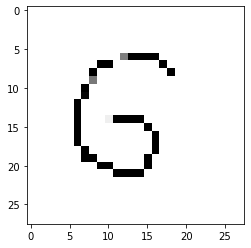

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [ ]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Результаты распознавания

In [ ]:
prediction

array([[3.8463067e-02, 2.3808902e-06, 4.1616008e-02, 1.9809275e-04,
        1.2702343e-08, 9.7022921e-02, 4.5903614e-01, 1.2219163e-04,
        3.5832626e-01, 5.2129822e-03]], dtype=float32)

In [ ]:
print(np.argmax(prediction))

6
